In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('/Users/anusiya/Desktop/LIU/DA_602/black_money_1.csv', low_memory=False)
df2 = pd.read_csv('/Users/anusiya/Desktop/LIU/DA_602/black_money_2.csv', low_memory=False)

In [2]:
df1.shape

(10000, 10)

In [3]:
df2.shape

(10000, 5)

In [4]:
df1.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Reported by Authority', 'Source of Money', 'Shell Companies Involved'],
      dtype='object')

In [5]:
df_combined = pd.concat([df1, df2]).groupby('Transaction ID').first().reset_index()

In [6]:
df_combined.shape

(10000, 14)

In [7]:
df_combined.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Reported by Authority', 'Source of Money', 'Shell Companies Involved',
       'Destination Country', 'Money Laundering Risk Score',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

In [8]:
print(df_combined.isna().sum())

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Reported by Authority          0
Source of Money                0
Shell Companies Involved       0
Destination Country            0
Money Laundering Risk Score    0
Financial Institution          0
Tax Haven Country              0
dtype: int64


In [9]:
df_combined = df_combined.rename(columns={'Country': 'Transaction_Country'})

In [10]:
df_combined.head()

,Transaction ID,Transaction_Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Reported by Authority,Source of Money,Shell Companies Involved,Destination Country,Money Laundering Risk Score,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01,Person_1101,Construction,True,Illegal,1.0,USA,6.0,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01,Person_7484,Luxury Goods,False,Illegal,0.0,South Africa,9.0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01,Person_3655,Construction,True,Illegal,3.0,Switzerland,1.0,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01,Person_3226,Oil & Gas,False,Illegal,2.0,Russia,7.0,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01,Person_7975,Real Estate,True,Illegal,9.0,USA,1.0,Bank_57,Luxembourg


In [11]:
df = df_combined

In [12]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'], errors='coerce')
df['Year'] = df['Date of Transaction'].dt.year
df.head()

,Transaction ID,Transaction_Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Reported by Authority,Source of Money,Shell Companies Involved,Destination Country,Money Laundering Risk Score,Financial Institution,Tax Haven Country,Year
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01,Person_1101,Construction,True,Illegal,1.0,USA,6.0,Bank_40,Singapore,2013
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01,Person_7484,Luxury Goods,False,Illegal,0.0,South Africa,9.0,Bank_461,Bahamas,2013
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01,Person_3655,Construction,True,Illegal,3.0,Switzerland,1.0,Bank_387,Switzerland,2013
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01,Person_3226,Oil & Gas,False,Illegal,2.0,Russia,7.0,Bank_353,Panama,2013
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01,Person_7975,Real Estate,True,Illegal,9.0,USA,1.0,Bank_57,Luxembourg,2013


In [13]:
# Print unique values for each column
for col in ['Transaction_Country', 'Transaction Type', 'Industry', 'Reported by Authority', 'Source of Money', 'Destination Country','Tax Haven Country','Year']:
    print(f"\nUnique values in {col}:") 
    print(df[col].unique())


Unique values in Transaction_Country:
['Brazil' 'China' 'UK' 'UAE' 'South Africa' 'Russia' 'Switzerland' 'India'
 'USA' 'Singapore']

Unique values in Transaction Type:
['Offshore Transfer' 'Stocks Transfer' 'Cash Withdrawal' 'Cryptocurrency'
 'Property Purchase']

Unique values in Industry:
['Construction' 'Luxury Goods' 'Oil & Gas' 'Real Estate' 'Arms Trade'
 'Casinos' 'Finance']

Unique values in Reported by Authority:
[True False]

Unique values in Source of Money:
['Illegal' 'Legal']

Unique values in Destination Country:
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']

Unique values in Tax Haven Country:
['Singapore' 'Bahamas' 'Switzerland' 'Panama' 'Luxembourg'
 'Cayman Islands']

Unique values in Year:
[2013 2014]


In [14]:
df.to_csv("/Users/anusiya/Downloads/602.csv", index=False, mode='w')

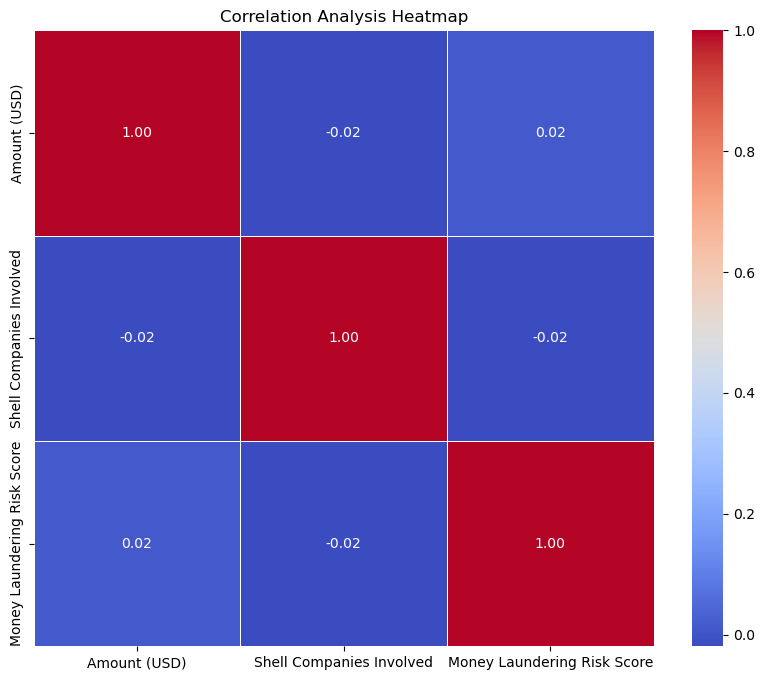

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis Heatmap")
plt.show()



Transaction_Country
China           2.691667e+09
South Africa    2.576112e+09
UK              2.527723e+09
Brazil          2.513360e+09
Singapore       2.495846e+09
Name: Amount (USD), dtype: float64



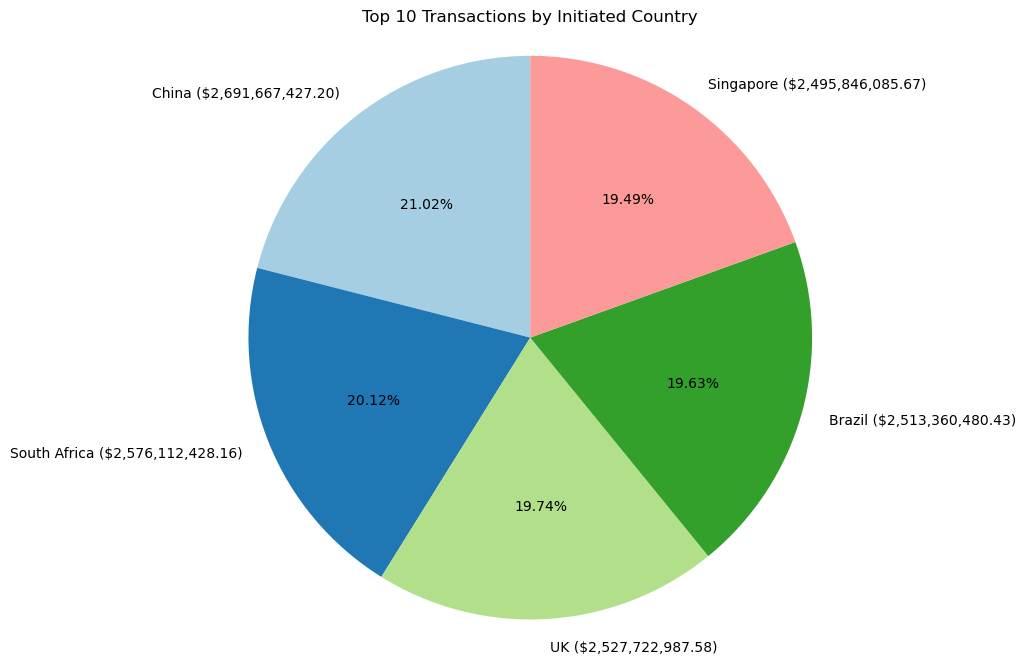

In [45]:
import matplotlib.pyplot as plt

# Grouping and sorting by transaction amounts, selecting top 10
amount = df.groupby('Transaction_Country')['Amount (USD)'].sum().sort_values(ascending=False).head(5)
print(amount)
print()

# Generating labels for the pie chart with formatted amounts
labels = [f'{country} (${amt:,.2f})' for country, amt in zip(amount.index, amount)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(amount, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Transactions by Initiated Country')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


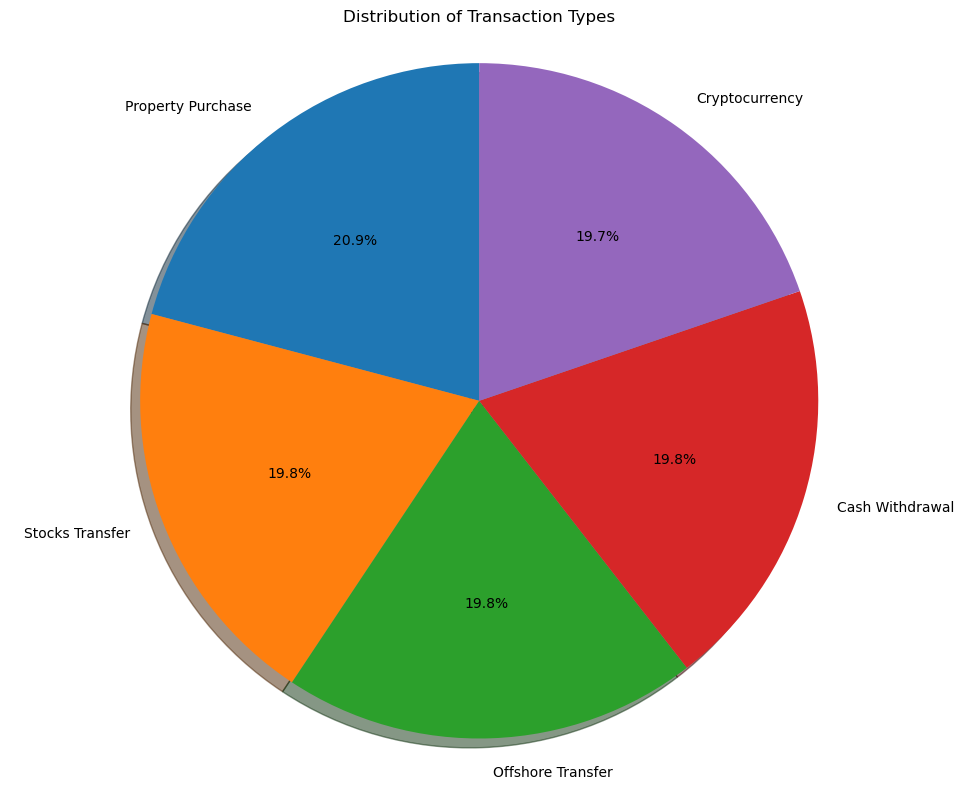

In [62]:
import matplotlib.pyplot as plt

# Count of transactions by type
transaction_counts = df_combined['Transaction Type'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, 
        labels=transaction_counts.index, 
        autopct='%1.1f%%',  # Show percentage
        startangle=90,      # Rotate chart
        shadow=True)        # Add shadow effect

plt.title('Distribution of Transaction Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


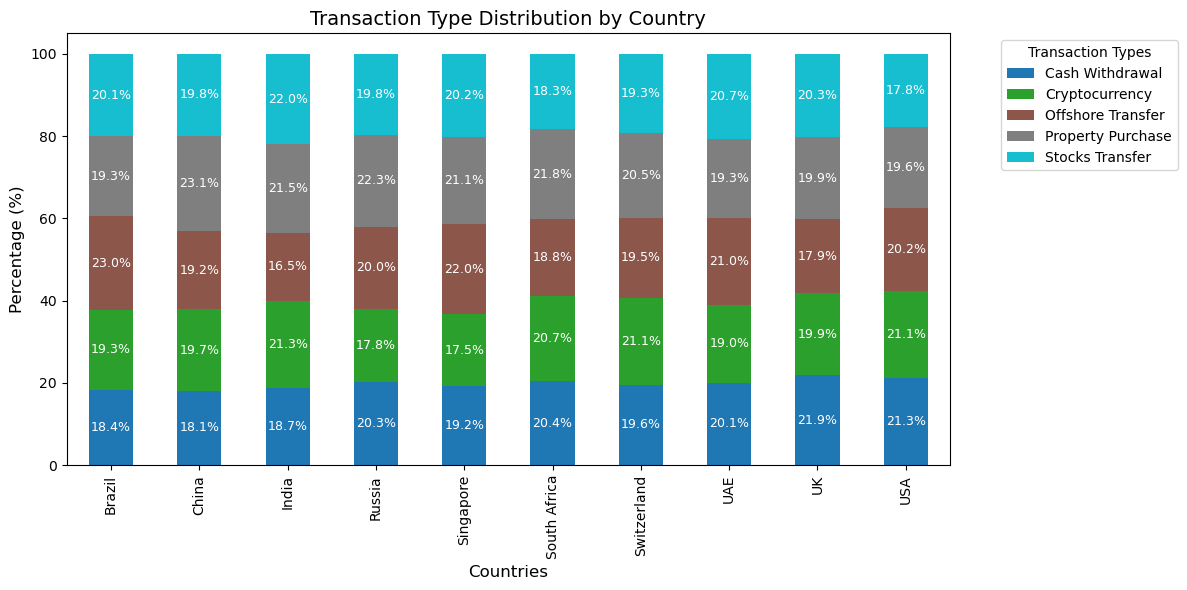

In [17]:
import matplotlib.pyplot as plt

# Assuming df_grouped and df_percentage are already calculated
df_grouped = df_combined.groupby(['Transaction_Country', 'Transaction Type']).size().unstack(fill_value=0)
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df_percentage.plot(kind='bar', stacked=True, ax=ax, colormap="tab10")

# Add title and labels
plt.title('Transaction Type Distribution by Country', fontsize=14)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Transaction Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate with percentage values
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero heights
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + bar.get_height() / 2
            ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='white')

# Adjust layout for better display
plt.tight_layout()
plt.show()

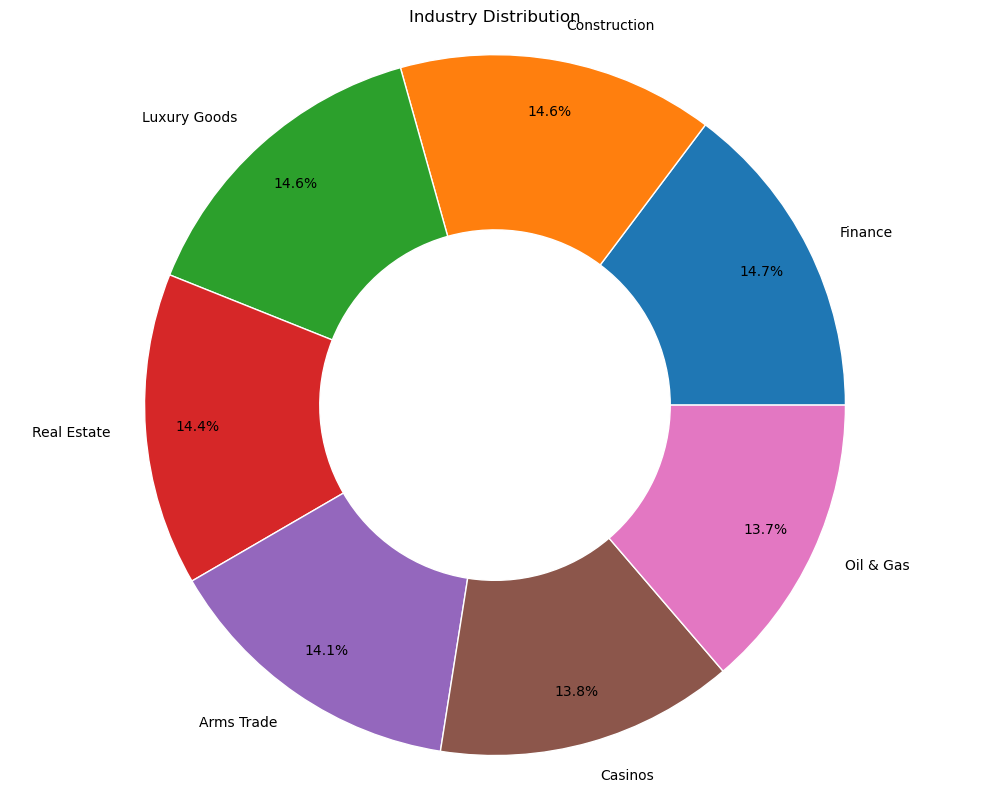

In [18]:
transaction_counts = df_combined['Industry'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, 
        labels=transaction_counts.index, 
        autopct='%1.1f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white'))
plt.title('Industry Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

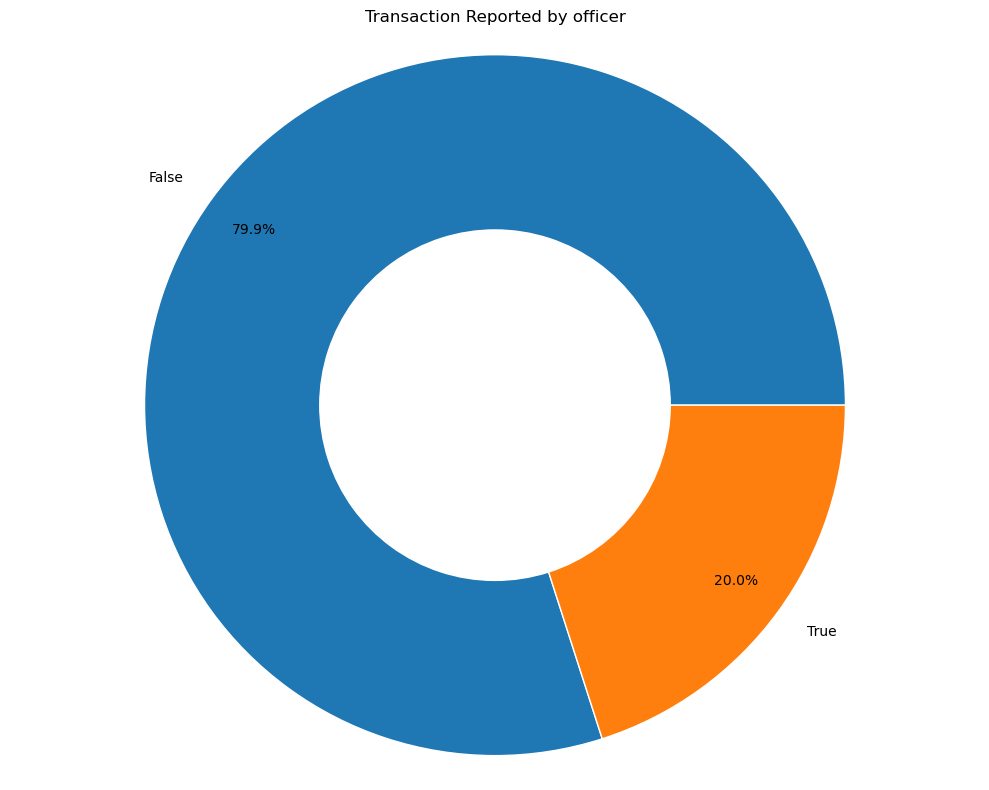

In [19]:
transaction_counts = df_combined['Reported by Authority'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, 
        labels=transaction_counts.index, 
        autopct='%1.1f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white'))
plt.title('Transaction Reported by officer')
plt.axis('equal')
plt.tight_layout()
plt.show()

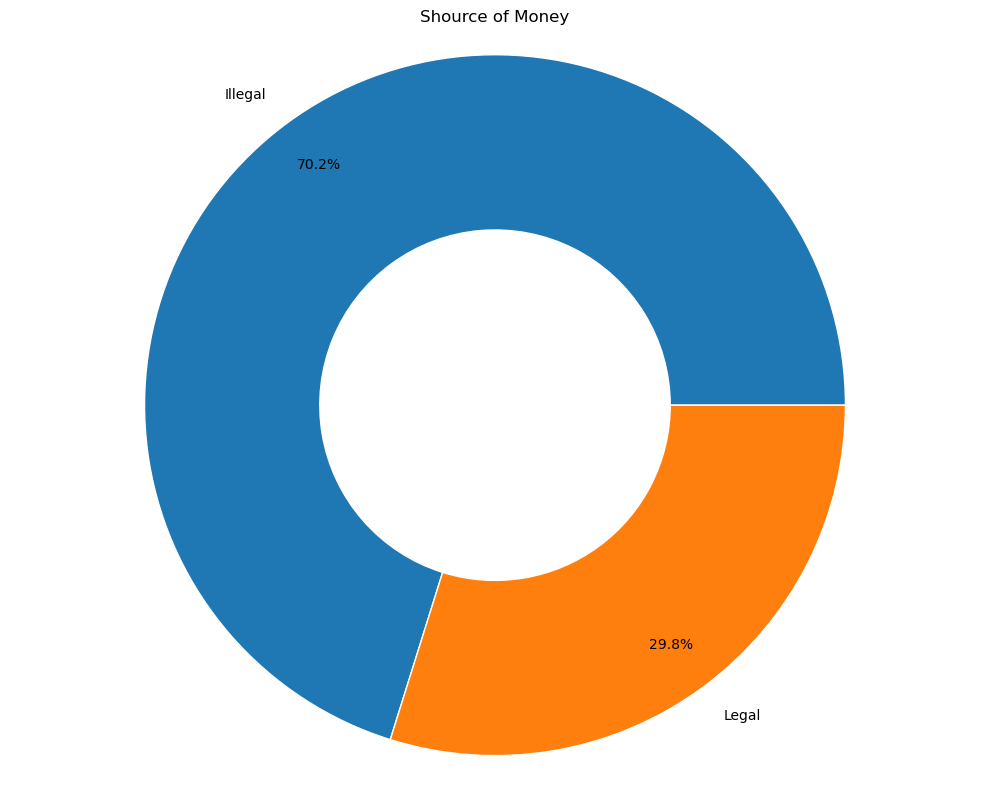

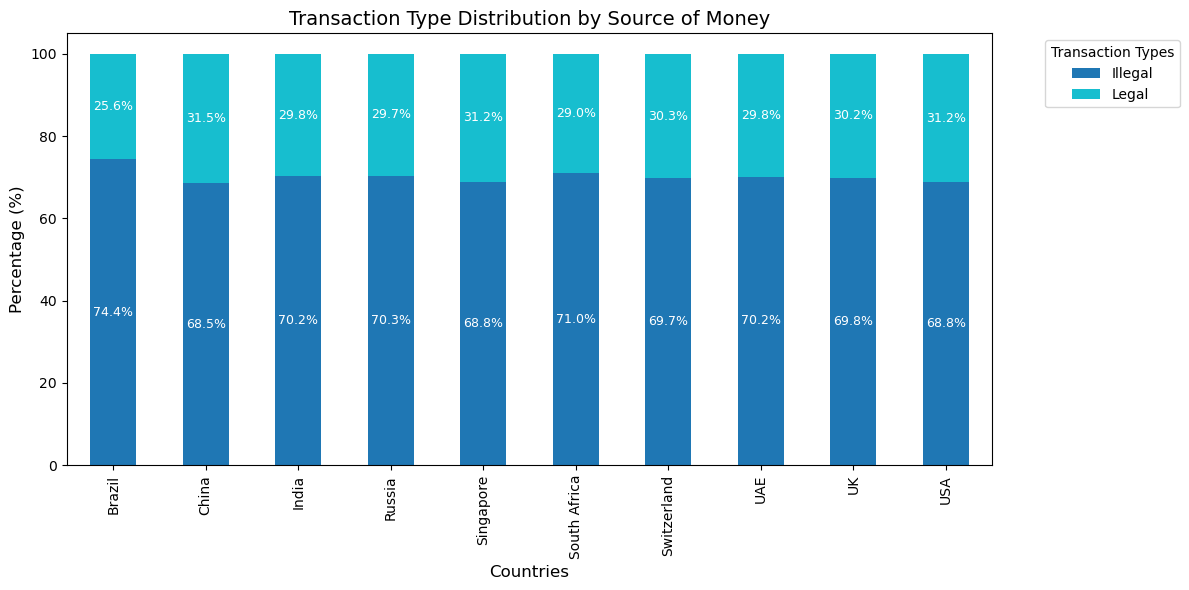

In [20]:
transaction_counts = df_combined['Source of Money'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, 
        labels=transaction_counts.index, 
        autopct='%1.1f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white'))
plt.title('Shource of Money')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Assuming df_grouped and df_percentage are already calculated
df_grouped = df_combined.groupby(['Transaction_Country', 'Source of Money']).size().unstack(fill_value=0)
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df_percentage.plot(kind='bar', stacked=True, ax=ax, colormap="tab10")

# Add title and labels
print()
plt.title('Transaction Type Distribution by Source of Money', fontsize=14)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Transaction Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate with percentage values
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero heights
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + bar.get_height() / 2
            ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='white')

# Adjust layout for better display
plt.tight_layout()
plt.show()


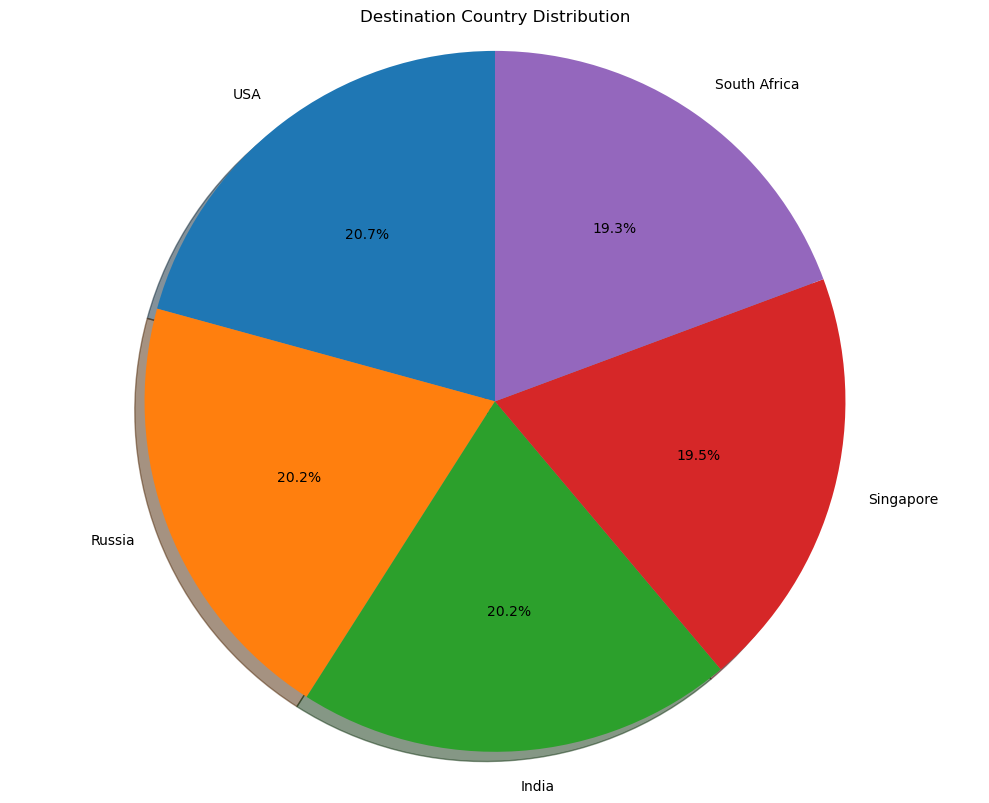

In [47]:


transaction_counts = df_combined['Destination Country'].value_counts().head(5)

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(transaction_counts.values, 
        labels=transaction_counts.index, 
        autopct='%1.1f%%',  # Show percentage
        startangle=90,      # Rotate chart
        shadow=True)        # Add shadow effect

plt.title('Destination Country Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


Tax Haven Country
Bahamas           4.023764e+09
Cayman Islands    4.193668e+09
Luxembourg        4.206718e+09
Panama            4.358097e+09
Singapore         4.127781e+09
Switzerland       4.108147e+09
Name: Amount (USD), dtype: float64



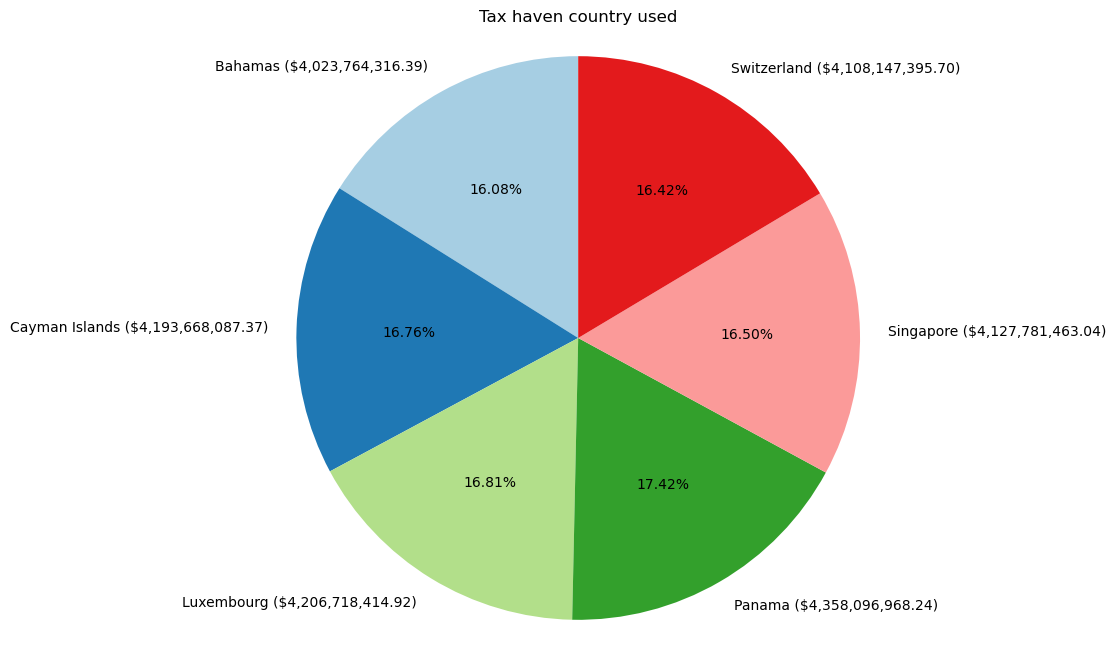

In [22]:
amount = df.groupby('Tax Haven Country')['Amount (USD)'].sum()
print(amount)
print()
labels = [f'{mem} (${amount:,.2f})' for mem, amount in zip(amount.index, amount)]
plt.figure(figsize=(8, 8))
plt.pie(amount, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tax haven country used')
plt.axis('equal')
plt.show()

Year
2013    2.190835e+10
2014    3.109825e+09
Name: Amount (USD), dtype: float64



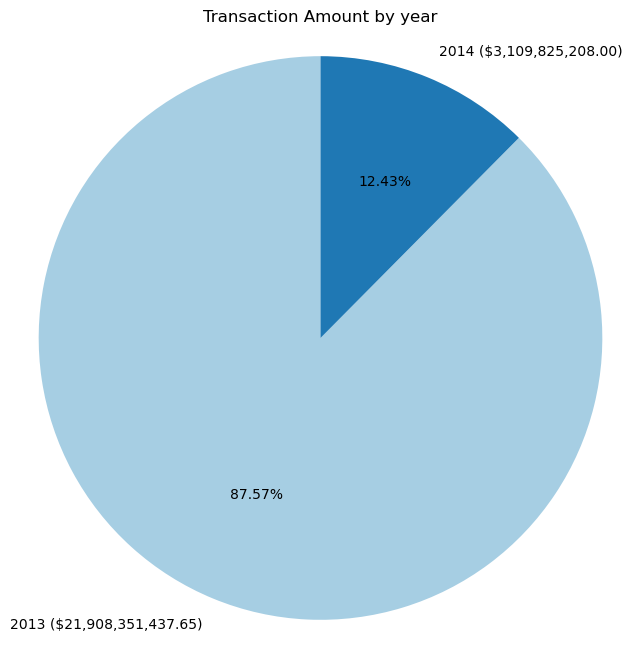

In [51]:
amount = df.groupby('Year')['Amount (USD)'].sum()
print(amount)
print()
labels = [f'{mem} (${amount:,.2f})' for mem, amount in zip(amount.index, amount)]
plt.figure(figsize=(8, 8))
plt.pie(amount, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Transaction Amount by year')
plt.axis('equal')
plt.show()

Shell Companies Involved
0.0    2.681201e+09
1.0    2.498291e+09
2.0    2.617520e+09
3.0    2.364531e+09
4.0    2.480004e+09
Name: Amount (USD), dtype: float64



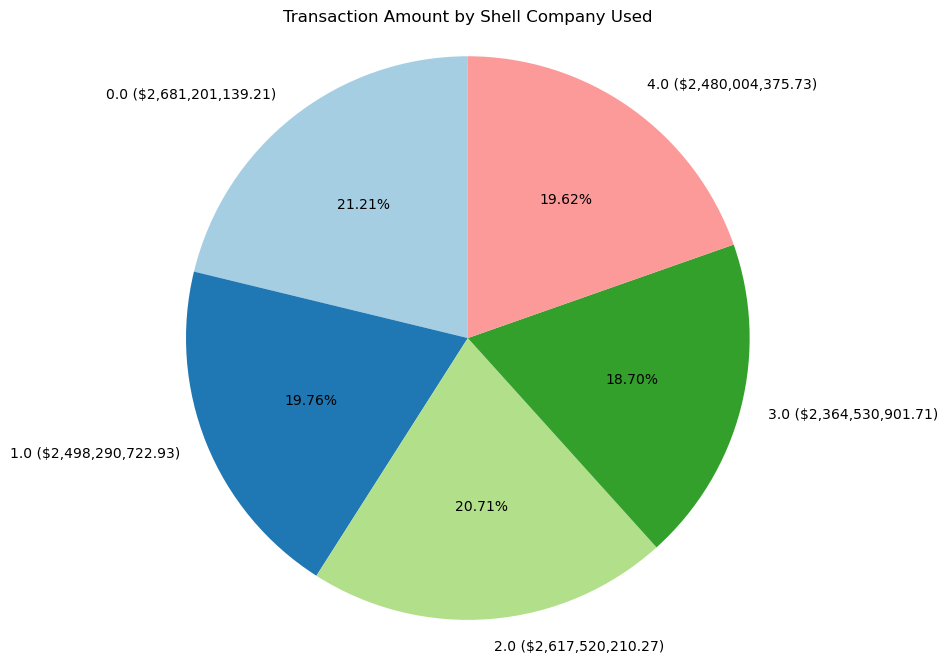

In [55]:
amount = df.groupby('Shell Companies Involved')['Amount (USD)'].sum().head(5)
print(amount)
print()
labels = [f'{mem} (${amount:,.2f})' for mem, amount in zip(amount.index, amount)]
plt.figure(figsize=(8, 8))
plt.pie(amount, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Transaction Amount by Shell Company Used')
plt.axis('equal')
plt.show()

In [49]:
df.head()

,Transaction ID,Transaction_Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Reported by Authority,Source of Money,Shell Companies Involved,Destination Country,Money Laundering Risk Score,Financial Institution,Tax Haven Country,Year
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01,Person_1101,Construction,True,Illegal,1.0,USA,6.0,Bank_40,Singapore,2013
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01,Person_7484,Luxury Goods,False,Illegal,0.0,South Africa,9.0,Bank_461,Bahamas,2013
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01,Person_3655,Construction,True,Illegal,3.0,Switzerland,1.0,Bank_387,Switzerland,2013
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01,Person_3226,Oil & Gas,False,Illegal,2.0,Russia,7.0,Bank_353,Panama,2013
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01,Person_7975,Real Estate,True,Illegal,9.0,USA,1.0,Bank_57,Luxembourg,2013


LinearRegression

Evaluation Metrics for Linear Regression:
Mean Squared Error (MSE): 8.861866194026541e-31
Root Mean Squared Error (RMSE): 9.413748559435047e-16
Mean Absolute Error (MAE): 6.592504320224179e-16
R² Score: 1.0


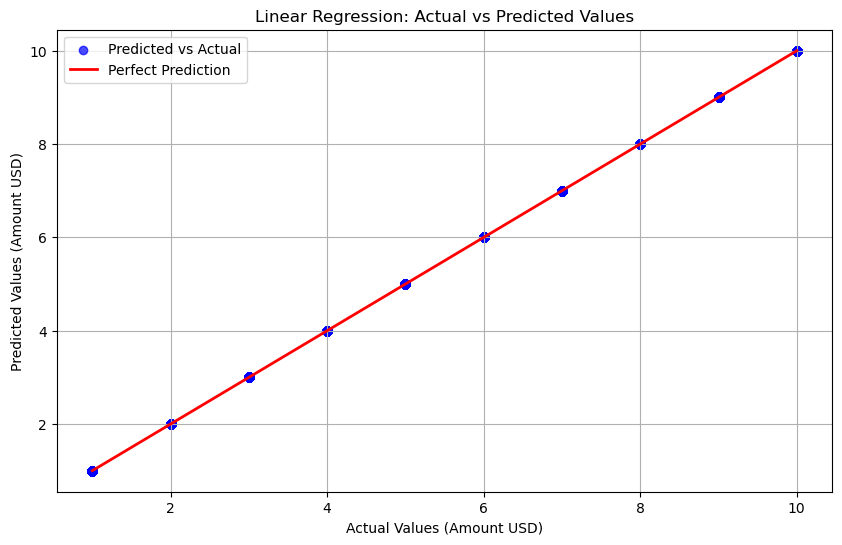

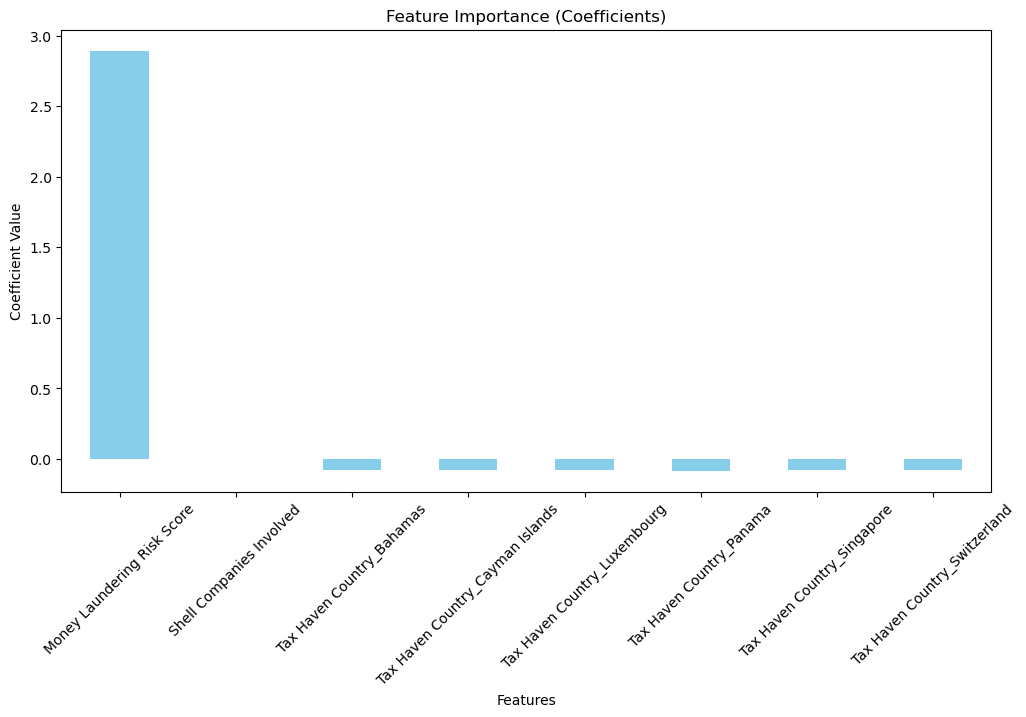

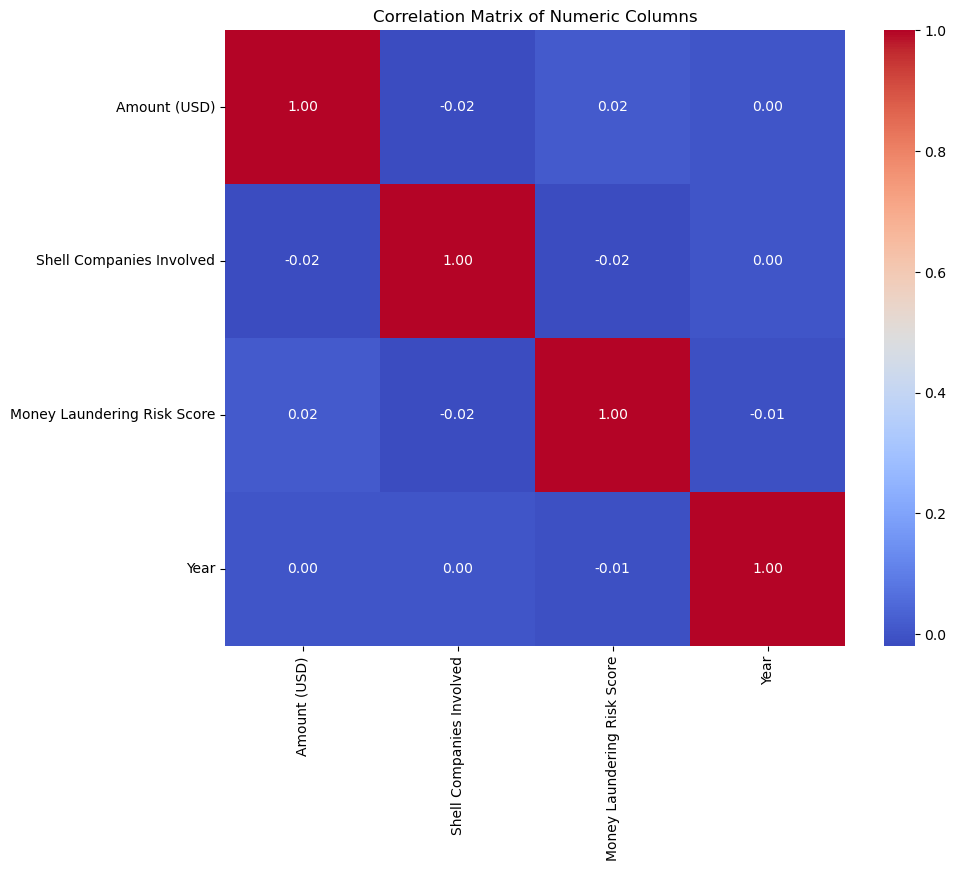

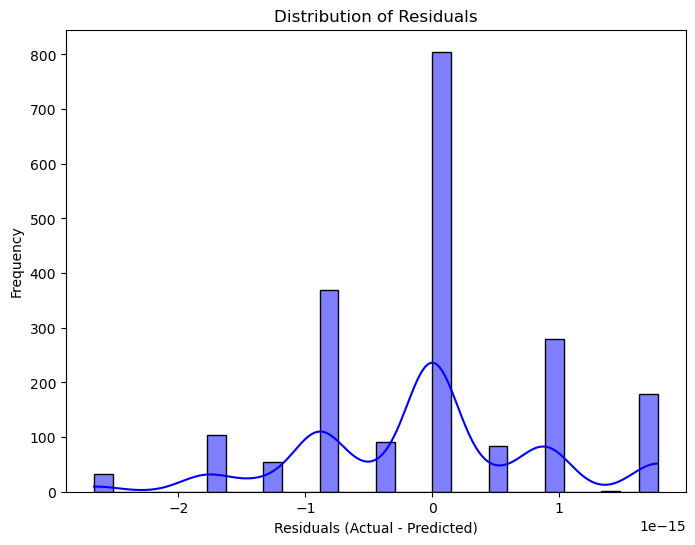

In [68]:
# OLDStep 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]

y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Linear Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance (Coefficients of the model)
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


Ridge Regression

Evaluation Metrics for Ridge Regression:
Mean Squared Error (MSE): 1.3395796924716795e-07
Root Mean Squared Error (RMSE): 0.0003660026902184845
Mean Absolute Error (MAE): 0.00031837184924851083
R² Score: 0.9999999842035238


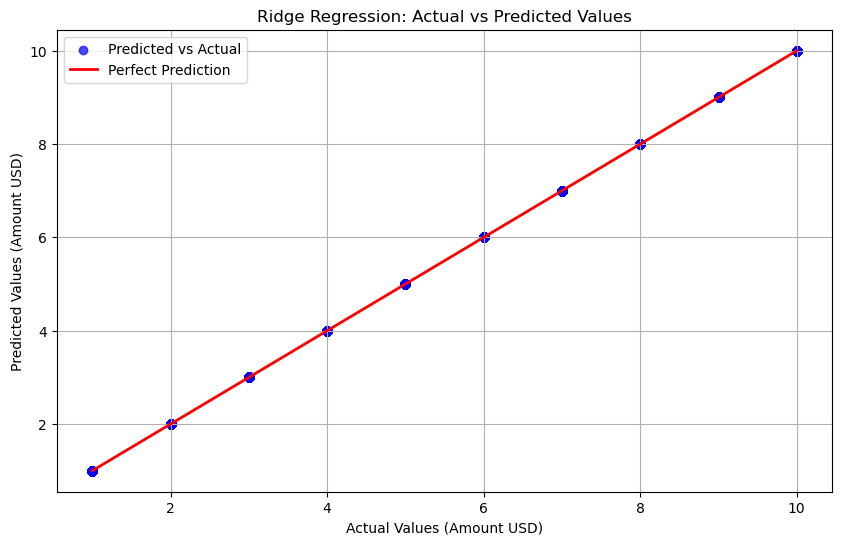

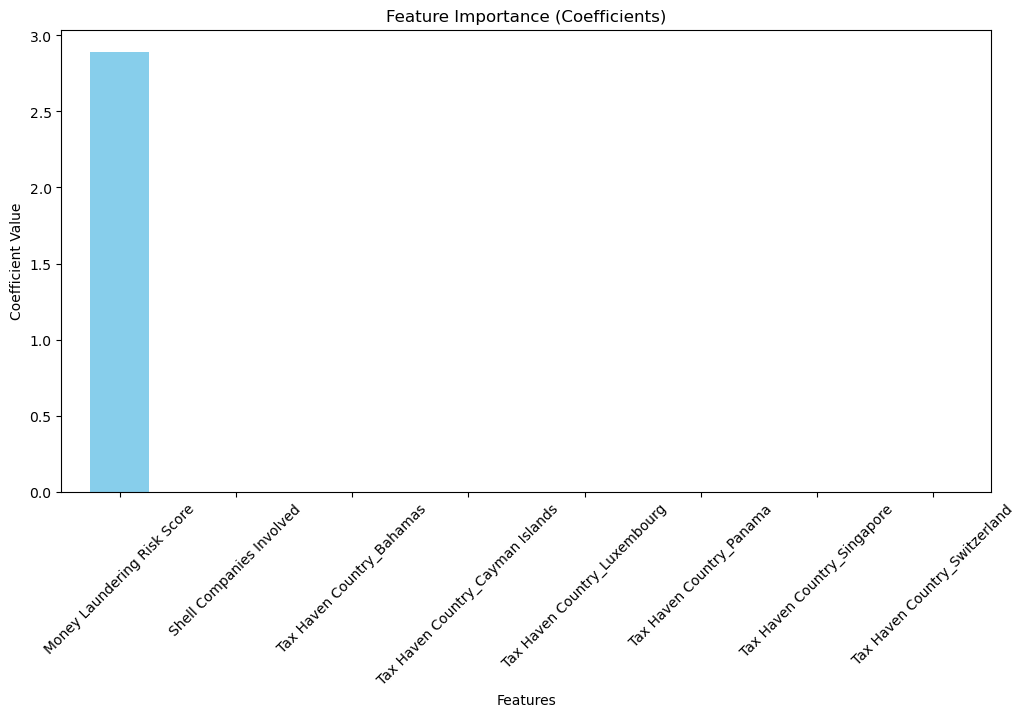

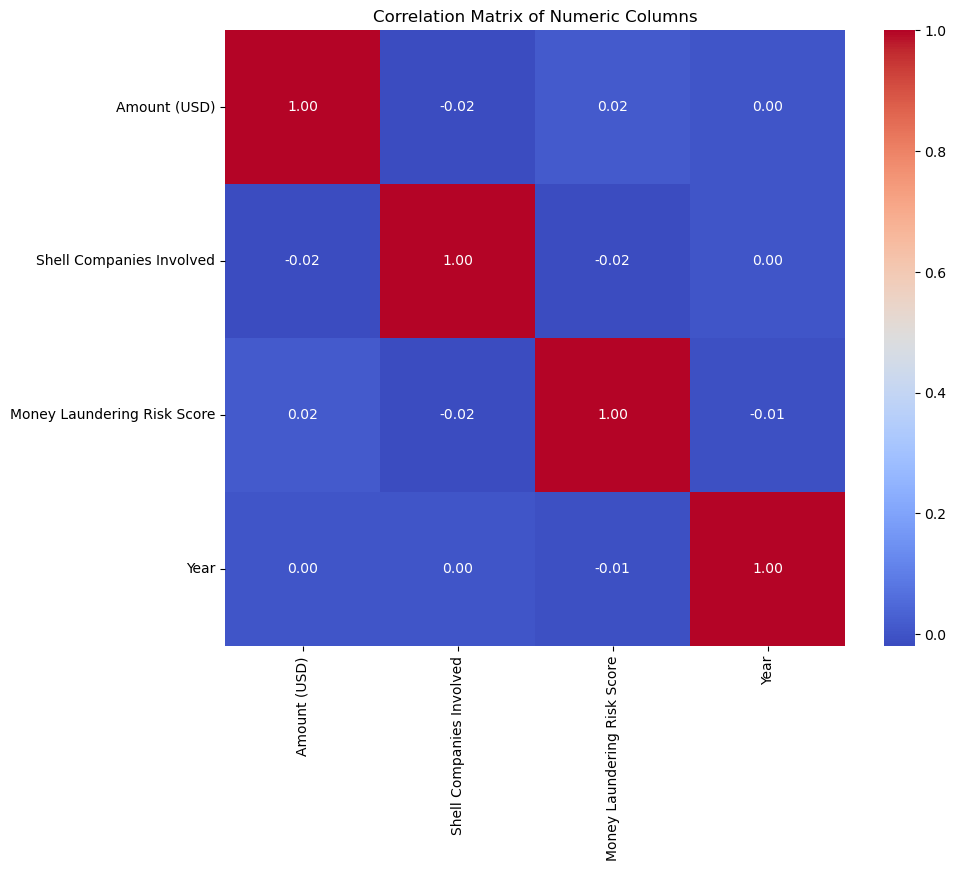

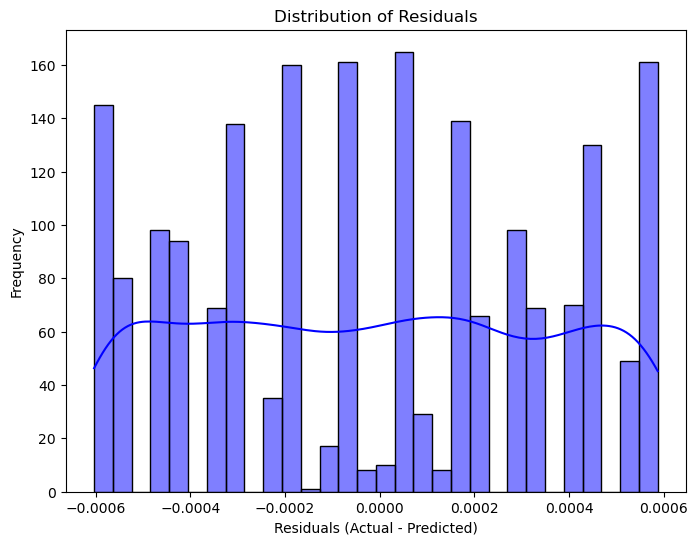

In [70]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]
#y = df['High Risk']

#X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]

y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Ridge regression model
model = Ridge(alpha=1.0)  # Adjust alpha as needed
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Ridge Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance (Coefficients of the model)
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


Lasso Regression

Evaluation Metrics for Lasso Regression:
Mean Squared Error (MSE): 1.0211358279760356
Root Mean Squared Error (RMSE): 1.0105126560197233
Mean Absolute Error (MAE): 0.8797735715310919
R² Score: 0.8795865003318996


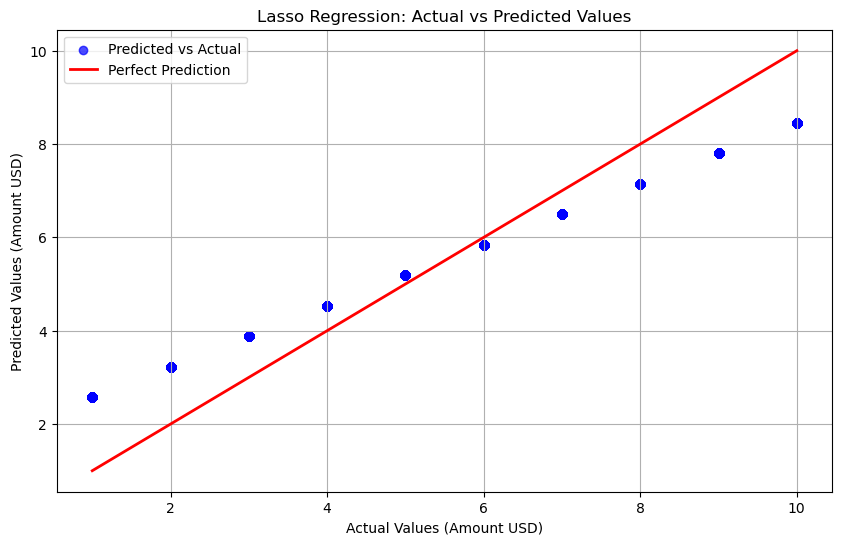

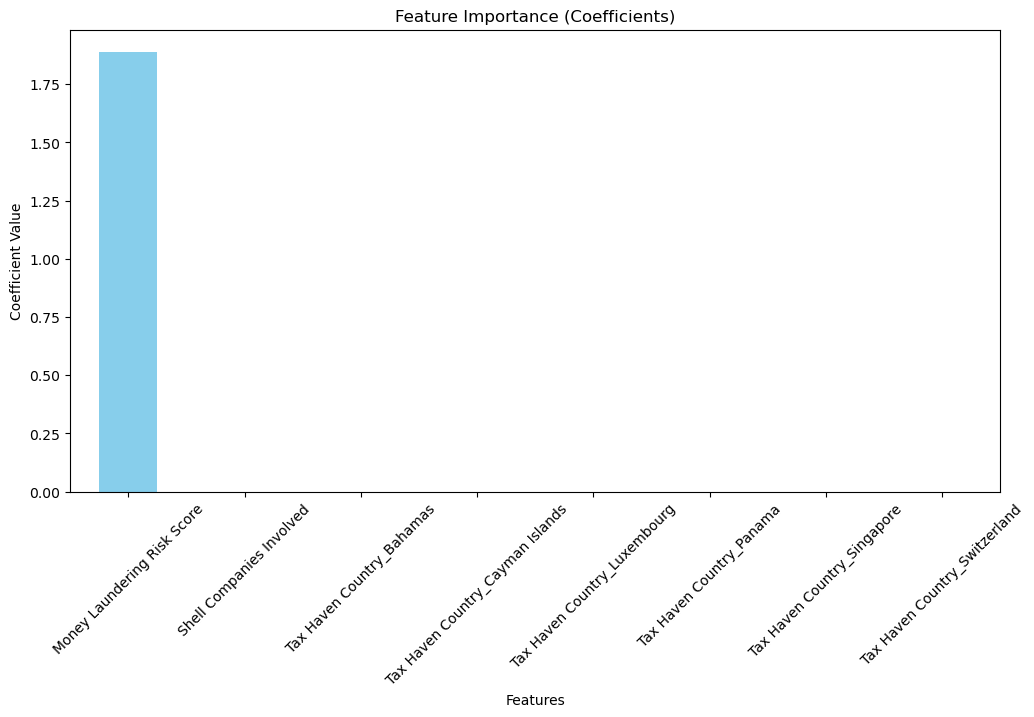

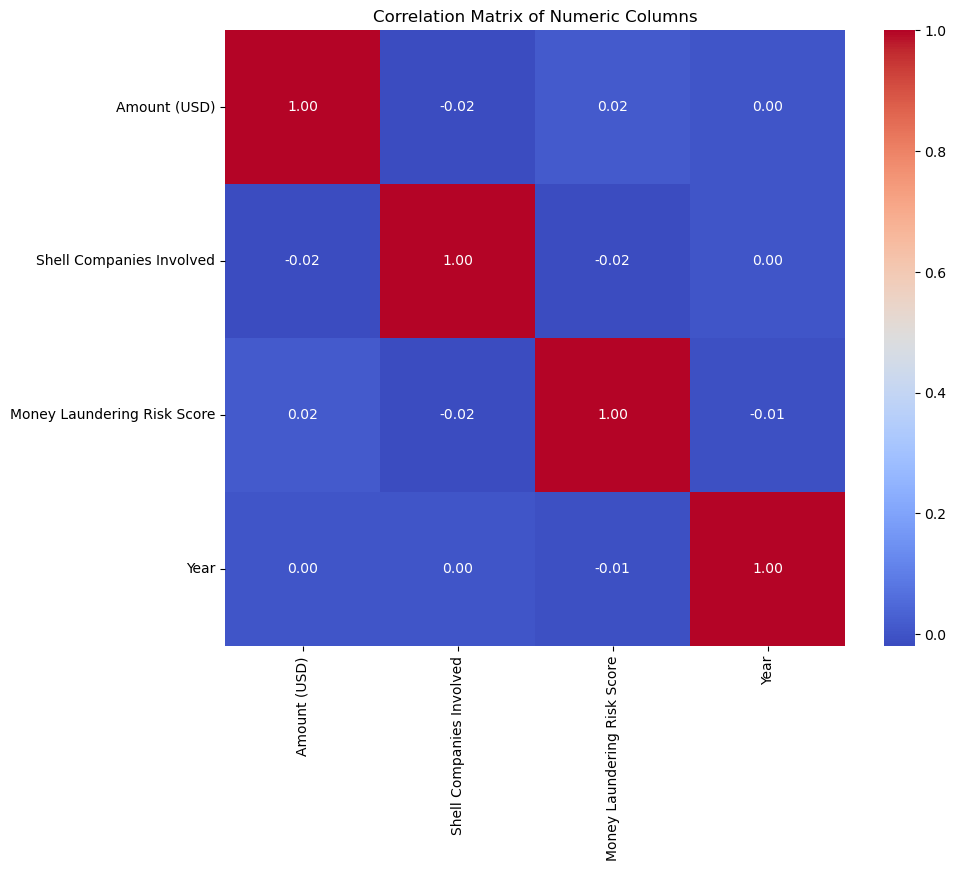

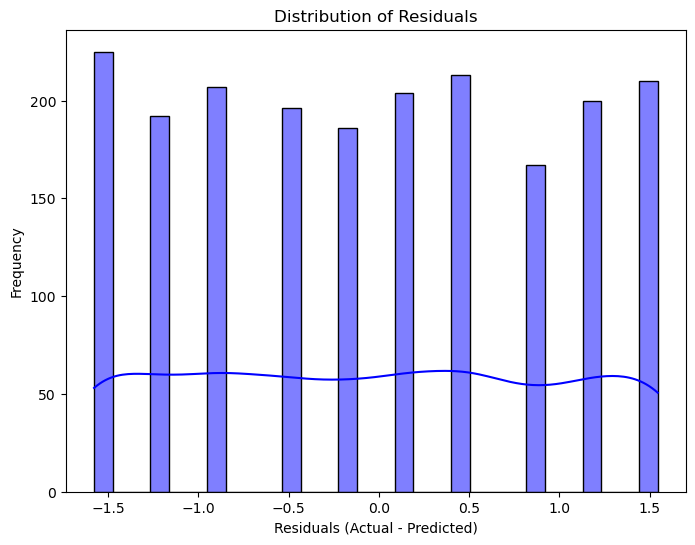

In [72]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country','Shell Companies Involved', 'Tax Haven Country']]
y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Lasso regression model
model = Lasso(alpha=1.0)  # Adjust alpha as needed
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Lasso Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance (Coefficients of the model)
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


XGBoost

Evaluation Metrics for XGBoost Regression:
Mean Squared Error (MSE): 2.0240114650960095e-10
Root Mean Squared Error (RMSE): 1.4226775689157433e-05
Mean Absolute Error (MAE): 9.596407413482666e-06
R² Score: 0.9999999999761326


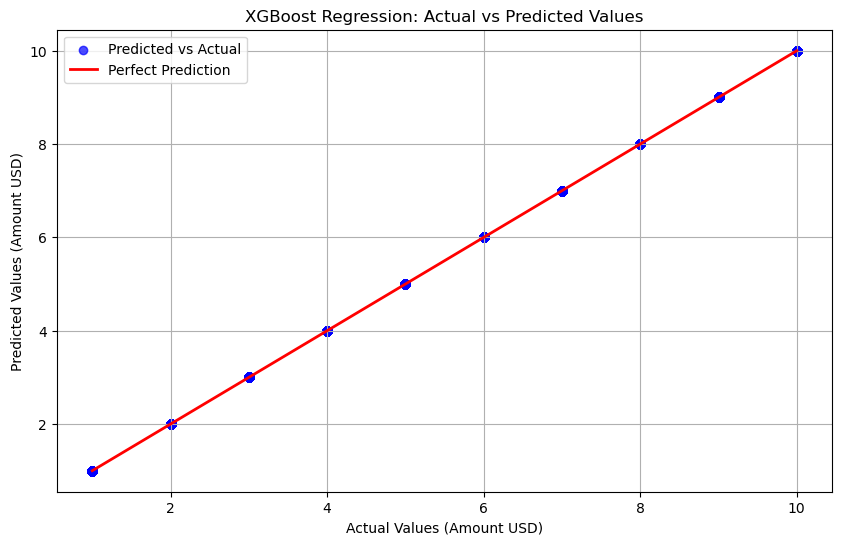

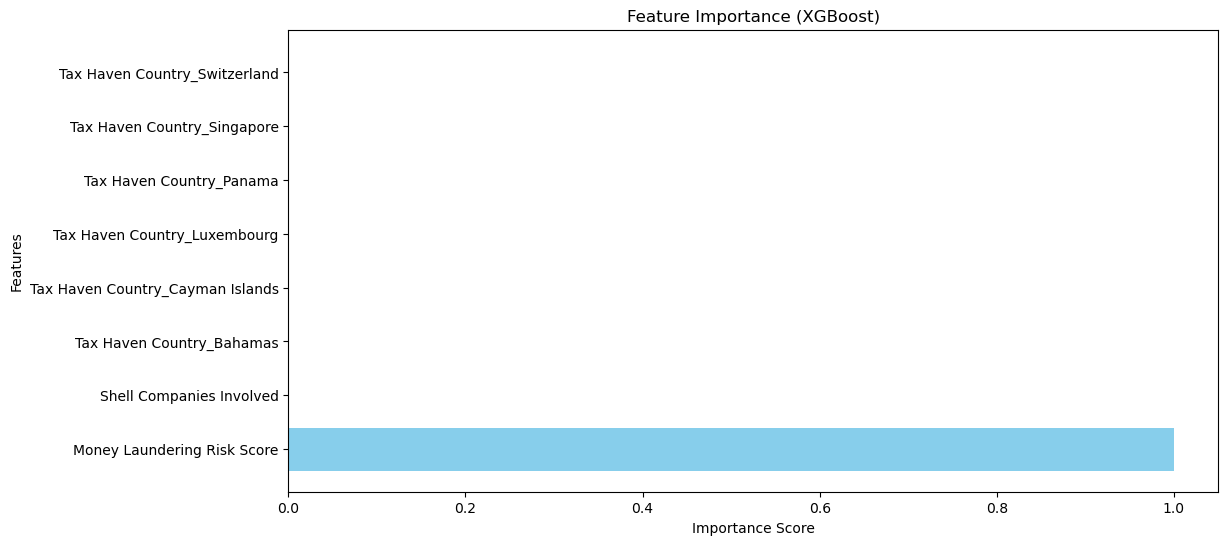

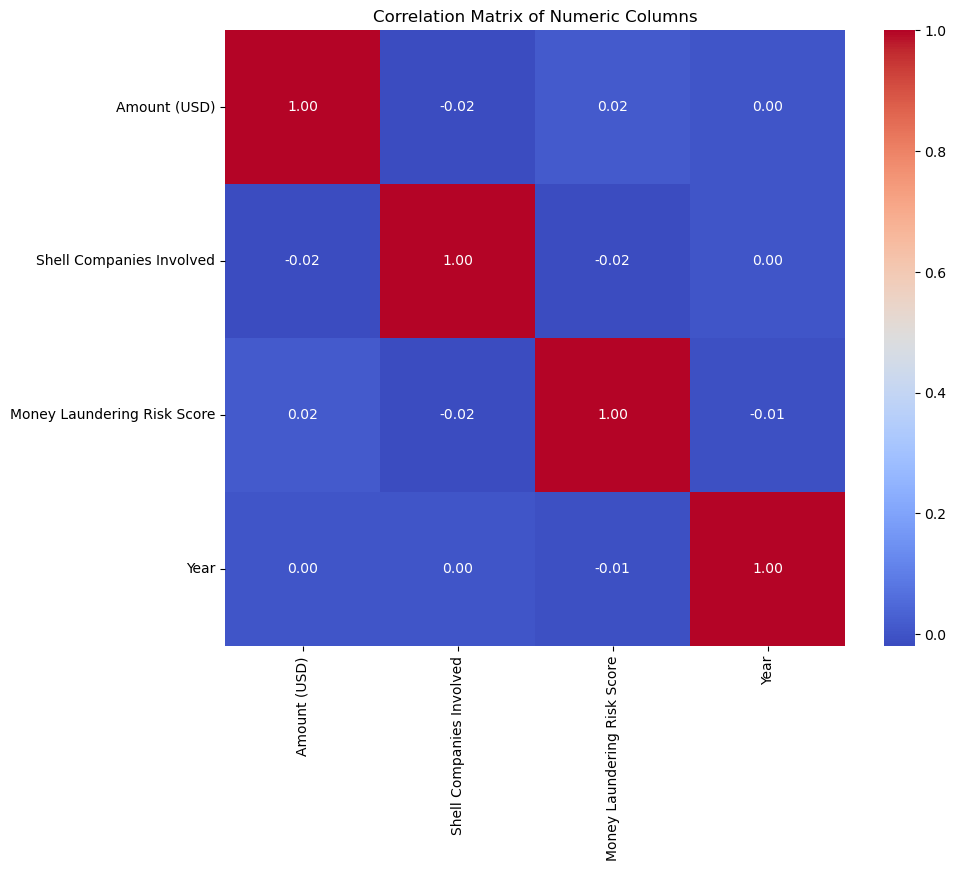

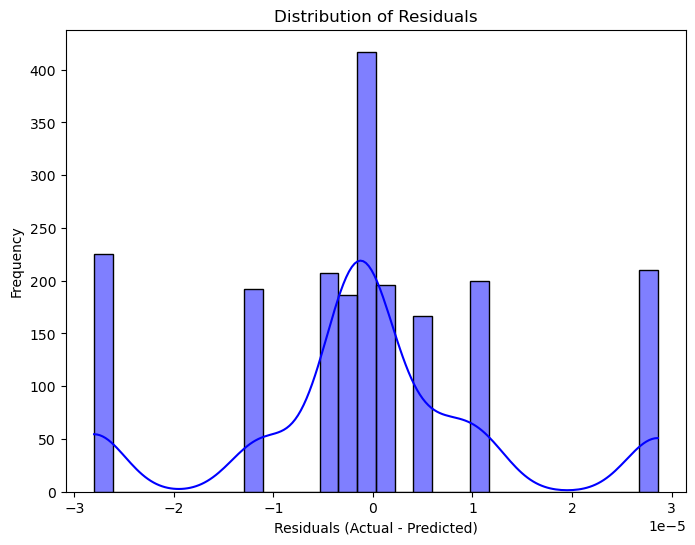

In [76]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]
y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for XGBoost Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("XGBoost Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance
plt.figure(figsize=(12, 6))
feature_importance = model.feature_importances_
plt.barh(X.columns, feature_importance, color='skyblue')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


RandomForestRegressor

Evaluation Metrics for Random Forest Regression:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R² Score: 1.0


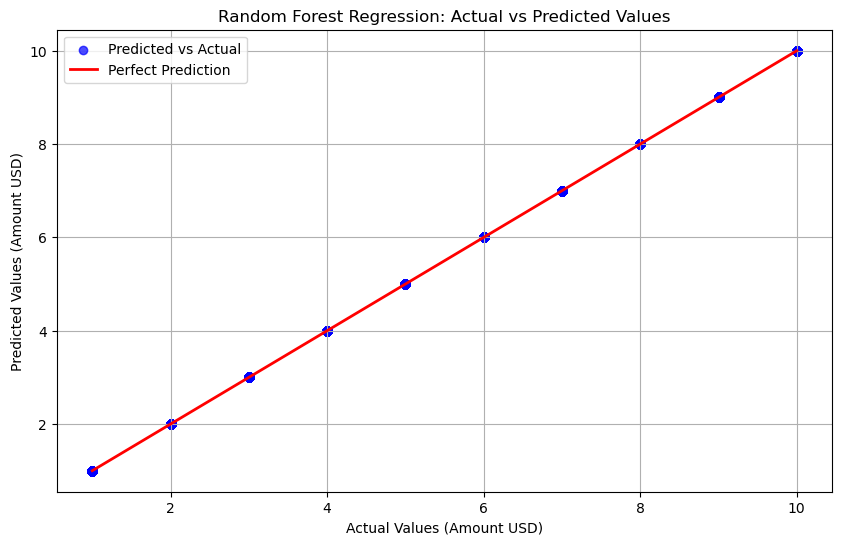

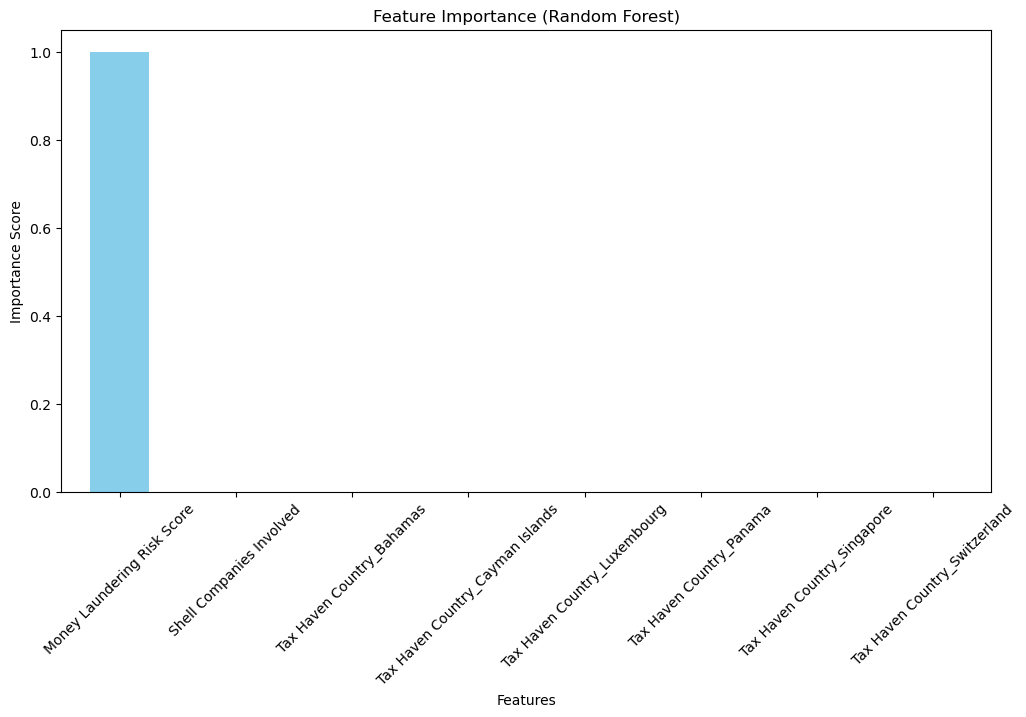

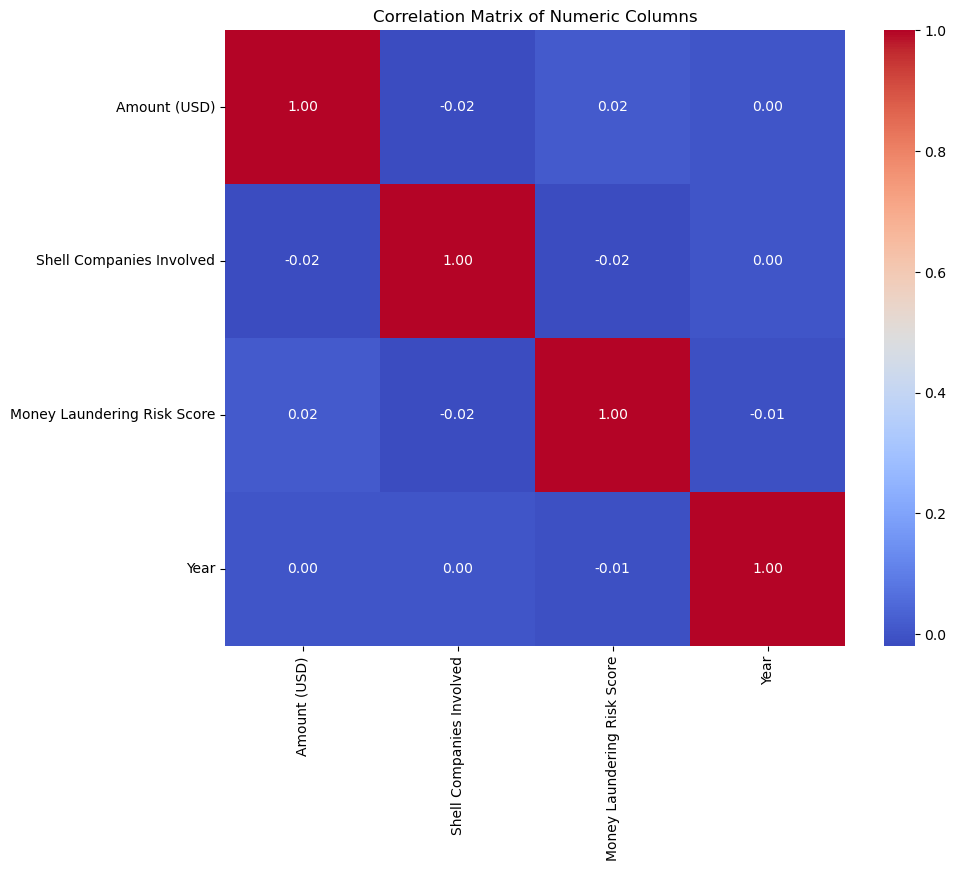

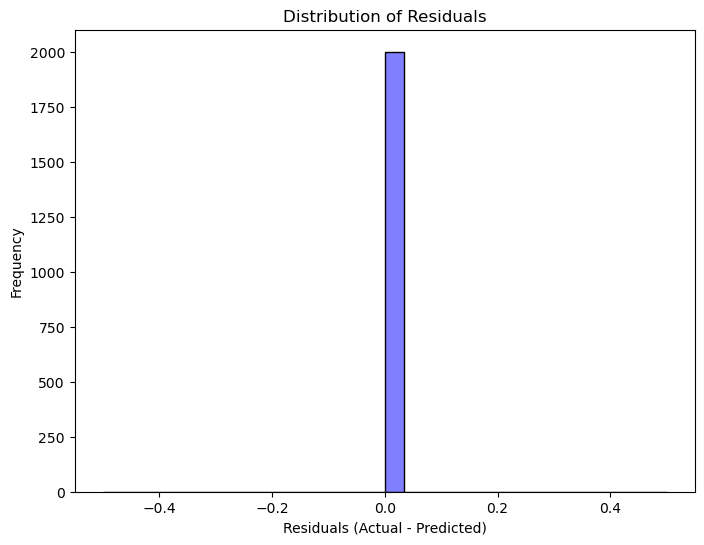

In [78]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]
y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Random Forest Regression:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("Random Forest Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


SVR

Evaluation Metrics for SVR:
Mean Squared Error (MSE): 0.004422323779446263
Root Mean Squared Error (RMSE): 0.06650055473036494
Mean Absolute Error (MAE): 0.05955588873808617
R² Score: 0.9994785145439427


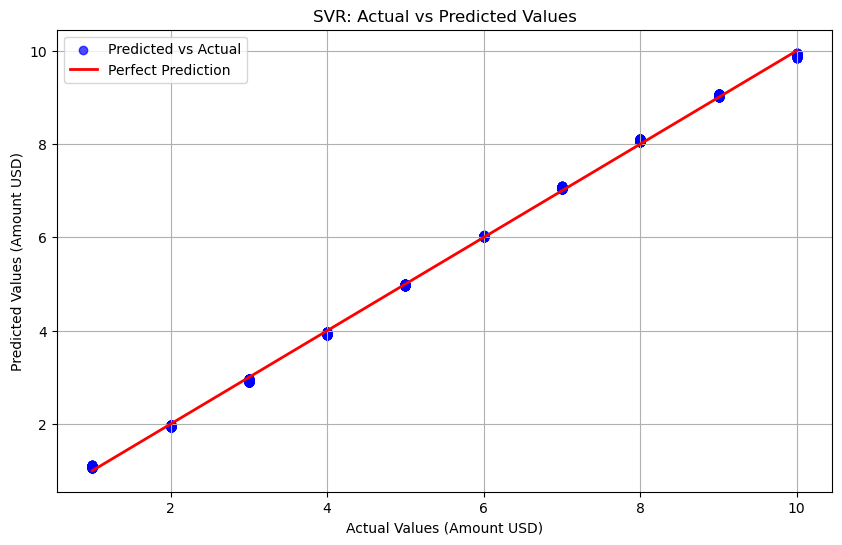

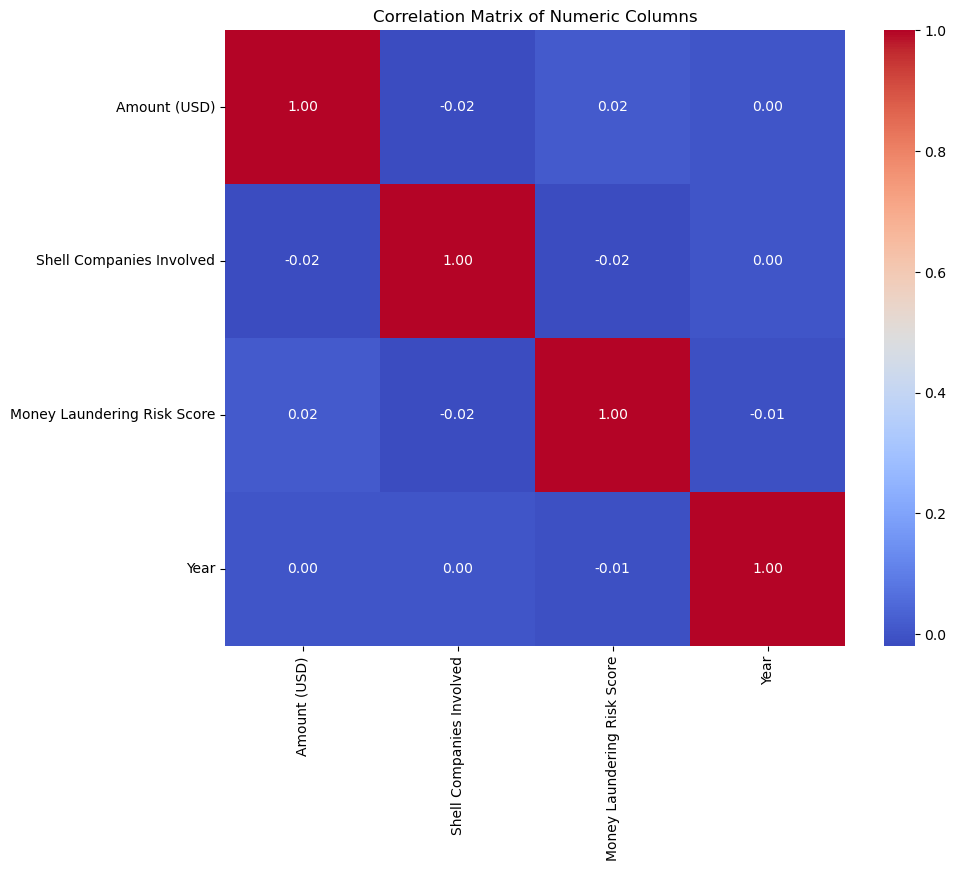

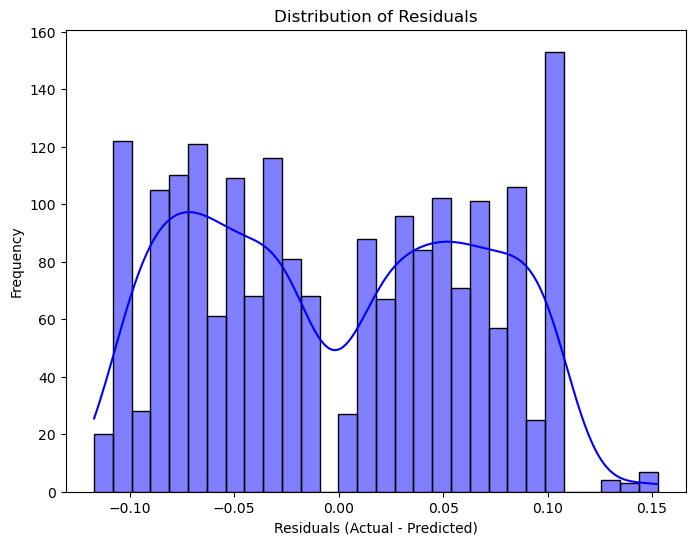

In [80]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 2: Preprocessing
# Handle missing values in 'Tax Haven Country' (if any)
df['Tax Haven Country'] = df['Tax Haven Country'].fillna('Unknown')

# Select features and target variable
X = df[['Transaction_Country','Destination Country', 'Shell Companies Involved', 'Tax Haven Country']]
y = df['Money Laundering Risk Score']

# One-hot encode 'Tax Haven Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['Tax Haven Country']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Tax Haven Country']))

# Combine encoded columns with other features
X = pd.concat([df[['Money Laundering Risk Score', 'Shell Companies Involved']].reset_index(drop=True), 
               encoded_columns_df.reset_index(drop=True)], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the SVR model
model = SVR(kernel='rbf')  # Radial Basis Function kernel
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model with all four metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for SVR:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction', linewidth=2)
plt.xlabel("Actual Values (Amount USD)")
plt.ylabel("Predicted Values (Amount USD)")
plt.title("SVR: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Additional visualizations
# 1. Feature importance (SVR doesn't directly provide coefficients; you may interpret feature importance through R^2 scores of feature subsets)
# Since direct access to coefficients isn't possible with non-linear kernels like RBF, use other techniques such as permutation importance, feature importance from Tree-based models, or inspecting the relationship between features and target variable
# Here we calculate importance using the relationship between features and target variable:
# For SVR, you can't directly interpret coefficients, but you can look at the impact of each feature using correlation or other methods:
# Feature importance calculation
feature_importance = np.abs(model.dual_coef_)  # Dual coefficients are what SVR uses internally for calculations
if len(feature_importance) == len(X.columns):
    plt.figure(figsize=(12, 6))
    pd.Series(feature_importance, index=X.columns).sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Feature Importance (SVR)')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Warning: The number of dual coefficients does not match the number of features.")

# 2. Correlation heatmap of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


Automated code result for analysis

In [82]:
def master_menu():
    print("\nMAIN MENU")
    print("1. SUM")
    print("2. UNIQUE")
    print("3. Pie Visualization")
    print("4. Bar Visualization")
    print("5. Exit")
    
    try:
        choice = int(input("\nWhat do you want to analyze: "))
    except ValueError:
        print("Invalid input. Please enter a number.\n")
        return None
    
    options = {
        1: "SUM",
        2: "UNIQUE",
        3: "Pie Visualization",
        4: "Bar Visualization",
        5: "Exit"
    }
    
    return options.get(choice, None)

In [108]:
def get_field_by_choice():
    print("\nSum amount by:")
    print("1. Transaction ID")
    print("2. Transaction Country")
    print("3. Transaction Type")
    print("4. Industry")
    print("5. Reported by Authority")
    print("6. Source of Money")
    print("7. Shell Companies Involved")
    print("8. Destination Country")
    print("9. Money Laundering Risk Score")
    print("10. Tax Haven Country")
    print("11. Year")
    print("12. High Risk")
    print("13. Risk Category")
    print("14. Exit")
    
    try:
        choice = int(input("\nEnter your choice: "))
    except ValueError:
        print("Invalid input. Please enter a number.\n")
        return None
    
    fields = {
        1: 'Transaction ID',
        2: 'Transaction_Country',
        3: 'Transaction Type',
        4: 'Industry',
        5: 'Reported by Authority',
        6: 'Source of Money',
        7: 'Shell Companies Involved',
        8: 'Destination Country',
        9: 'Money Laundering Risk Score',
        10: 'Tax Haven Country',
        11: 'Year',
        12: 'High Risk',
        13: 'Risk Category'
    }
    
    if choice == 14:
        print("Exiting program.")
        return "exit"
    
    return fields.get(choice, None)

In [110]:
def sumvariable():
    field = get_field_by_choice()
    if field not in df.columns:
        return "Invalid field name. Please select a valid option."
    else:
        print(f"Sum of amount in {field}:")
        print(df.groupby(field)['Amount (USD)'].sum())

In [112]:
def unique_values():
    field = get_field_by_choice()
    if field and field != "exit":
        unique_vals = df[field].unique()
        print(f"Unique values in {field}:")
        print(unique_vals)

In [114]:
import matplotlib.pyplot as plt

def visualization():
    # Ask the user to choose a field for grouping
    field = get_field_by_choice()
    if field == "exit" or field is None:
        return

    # Check if the field exists in the DataFrame
    if field not in df.columns:
        print(f"Invalid field: {field}. Cannot create a pie chart.\n")
        return

    # Group by the selected field and calculate the sum of transaction amounts
    grouped_data = df.groupby(field)['Amount (USD)'].sum()

    # Sort data in descending order and select the top 10
    grouped_data = grouped_data.sort_values(ascending=False)
    top_10 = grouped_data.head(10)

    # If there are more than 10 categories, sum the remaining into "Other"
    if len(grouped_data) > 10:
        other_sum = grouped_data.iloc[10:].sum()
        top_10['Other'] = other_sum

    # Prepare data for the pie chart
    labels = top_10.index
    values = top_10.values

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 10 Distribution of Amounts by {field}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [116]:
import matplotlib.pyplot as plt

def visualization_box():
    # Ask the user to choose a field for grouping
    field = get_field_by_choice()
    if field == "exit" or field is None:
        return

    # Check if the field exists in the DataFrame
    if field not in df.columns:
        print(f"Invalid field: {field}. Cannot create a bar graph.\n")
        return

    # Group by the selected field and calculate the sum of transaction amounts
    grouped_data = df.groupby(field)['Amount (USD)'].sum()

    # Sort data in descending order and select the top 10
    grouped_data = grouped_data.sort_values(ascending=False)
    top_10 = grouped_data.head(10)

    # Prepare data for the bar graph
    labels = top_10.index
    values = top_10.values

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel(field, fontsize=12)
    plt.ylabel('Total Amount (USD)', fontsize=12)
    plt.title(f"Top 10 Distribution of Amounts by {field}", fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()



MAIN MENU
1. SUM
2. UNIQUE
3. Pie Visualization
4. Bar Visualization
5. Exit



What do you want to analyze:  1



Sum amount by:
1. Transaction ID
2. Transaction Country
3. Transaction Type
4. Industry
5. Reported by Authority
6. Source of Money
7. Shell Companies Involved
8. Destination Country
9. Money Laundering Risk Score
10. Tax Haven Country
11. Year
12. High Risk
13. Risk Category
14. Exit



Enter your choice:  11


Sum of amount in Year:
Year
2013    2.190835e+10
2014    3.109825e+09
Name: Amount (USD), dtype: float64

MAIN MENU
1. SUM
2. UNIQUE
3. Pie Visualization
4. Bar Visualization
5. Exit



What do you want to analyze:  3



Sum amount by:
1. Transaction ID
2. Transaction Country
3. Transaction Type
4. Industry
5. Reported by Authority
6. Source of Money
7. Shell Companies Involved
8. Destination Country
9. Money Laundering Risk Score
10. Tax Haven Country
11. Year
12. High Risk
13. Risk Category
14. Exit



Enter your choice:  11


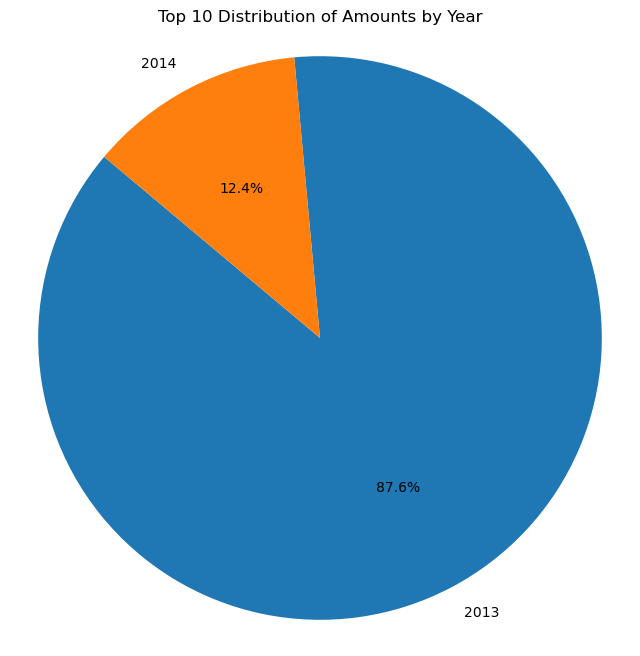


MAIN MENU
1. SUM
2. UNIQUE
3. Pie Visualization
4. Bar Visualization
5. Exit



What do you want to analyze:  4



Sum amount by:
1. Transaction ID
2. Transaction Country
3. Transaction Type
4. Industry
5. Reported by Authority
6. Source of Money
7. Shell Companies Involved
8. Destination Country
9. Money Laundering Risk Score
10. Tax Haven Country
11. Year
12. High Risk
13. Risk Category
14. Exit



Enter your choice:  11


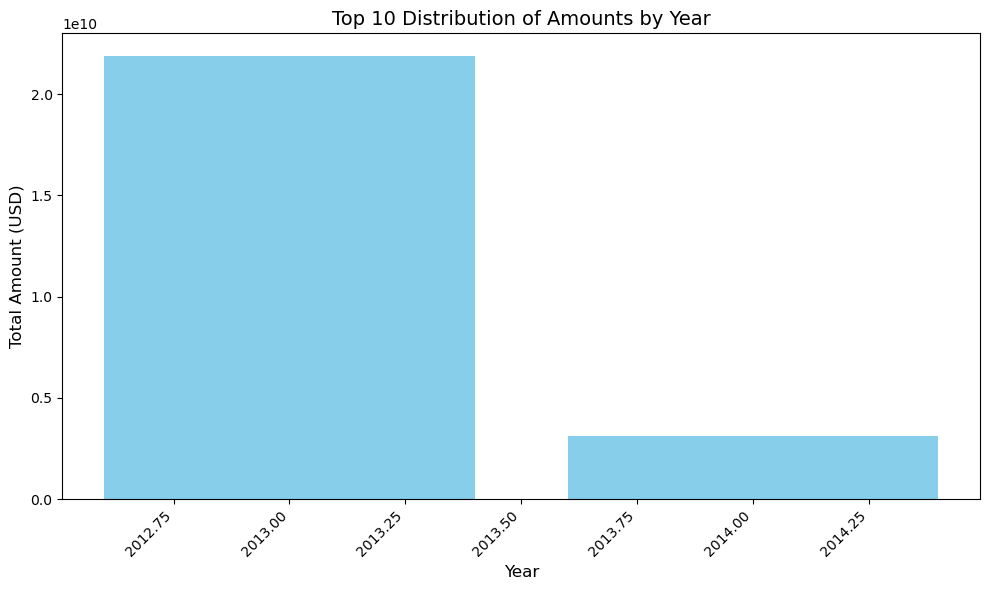


MAIN MENU
1. SUM
2. UNIQUE
3. Pie Visualization
4. Bar Visualization
5. Exit



What do you want to analyze:  5


Exiting the program. Goodbye!


In [118]:
while True:
    choice = master_menu()
    if choice == "SUM":
        sumvariable()
    elif choice == "UNIQUE":
        unique_values()
    elif choice == "Pie Visualization":
        visualization()
    elif choice == "Bar Visualization":
        visualization_box()
    elif choice == "Exit":
        print("Exiting the program. Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")